In [48]:
import numpy as np
from scipy.stats import wasserstein_distance
from scipy.special import kl_div
import pandas as pd

from table_evaluator import load_data, TableEvaluator

In [36]:
# original dataset
real_data = pd.read_csv("processed_edit.csv", delimiter=",", header=None)
# synthetic dataset
fake_data = pd.read_csv("synthetic_edit.csv", delimiter=",", header=None)

In [37]:
# randomly select 100000 rows from the dataset
real_data = real_data.sample(n=100000, random_state=42)

In [38]:
real_data.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
35956,0,0,7,0,1,1,5,11,4,2,...,0,2,0,0,0,0,0,0,1,0
60927,0,1,5,0,1,1,0,0,3,1,...,0,0,0,0,0,0,0,0,1,0
79920,0,0,6,0,3,3,0,3,3,1,...,0,0,0,0,0,0,0,0,1,0
50078,0,1,3,0,2,1,0,6,7,7,...,0,0,0,0,0,0,0,0,1,1
44080,1,0,6,0,1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,2


In [39]:
real_data.shape

(100000, 48)

In [40]:
# Calculate the statistical measures for both datasets
stats_original = real_data.describe()
stats_generated = fake_data.describe()

# Calculate the difference between the means of each column
mean_diff = np.abs(stats_original.loc['mean'] - stats_generated.loc['mean'])
print('\nMean difference between original and generated datasets:\n', mean_diff)


Mean difference between original and generated datasets:
 0     0.00516
1     0.07137
2     0.29730
3     0.07405
4     0.04613
5     0.22996
6     0.37892
7     0.03613
8     0.04144
9     0.88687
10    3.19274
11    0.00053
12    0.34108
13    0.29648
14    0.11182
15    0.09479
16    3.79247
17    1.32584
18    4.34959
19    0.48719
20    0.10695
21    0.34589
22    0.03867
23    0.02949
24    0.00749
25    0.00098
26    0.05936
27    0.00001
28    0.00389
29    0.12356
30    0.00023
31    0.07671
32    0.06599
33    0.00315
34    0.00046
35    0.00003
36    0.00039
37    0.00000
38    0.00000
39    0.30267
40    0.00707
41    0.00012
42    0.00001
43    0.00002
44    0.00001
45    0.16380
46    0.05321
47    0.00362
Name: mean, dtype: float64


In [56]:
data1 = real_data.values
data2 = fake_data.values

In [43]:
# calculate the Wasserstein distance between the datasets
w_distance = wasserstein_distance(data1.ravel(), data2.ravel())
print("Wasserstein distance between the datasets:", w_distance)

Wasserstein distance between the datasets: 0.313742916666666


In [44]:
from scipy.spatial.distance import jensenshannon

js_divergence = jensenshannon(data1.ravel(), data2.ravel())
print("Jensen-Shannon Divergence={}".format(js_divergence))

Jensen-Shannon Divergence=0.4934290311704681


In [49]:
table_evaluator = TableEvaluator(real_data, fake_data)

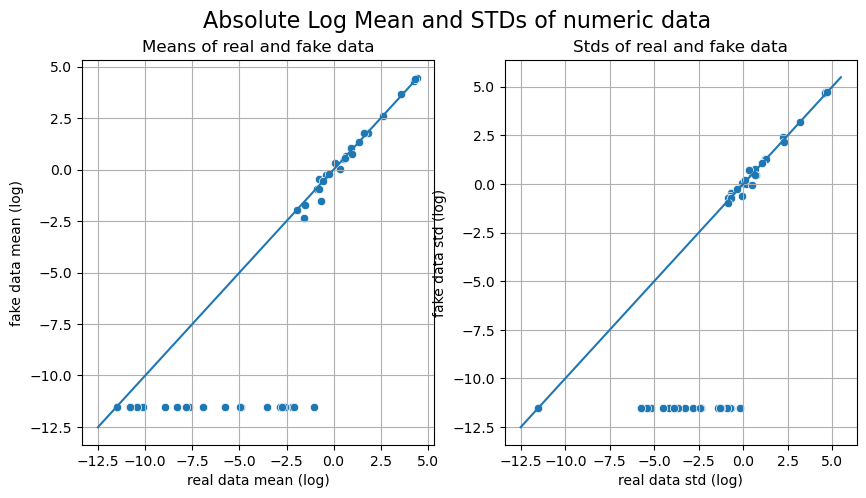

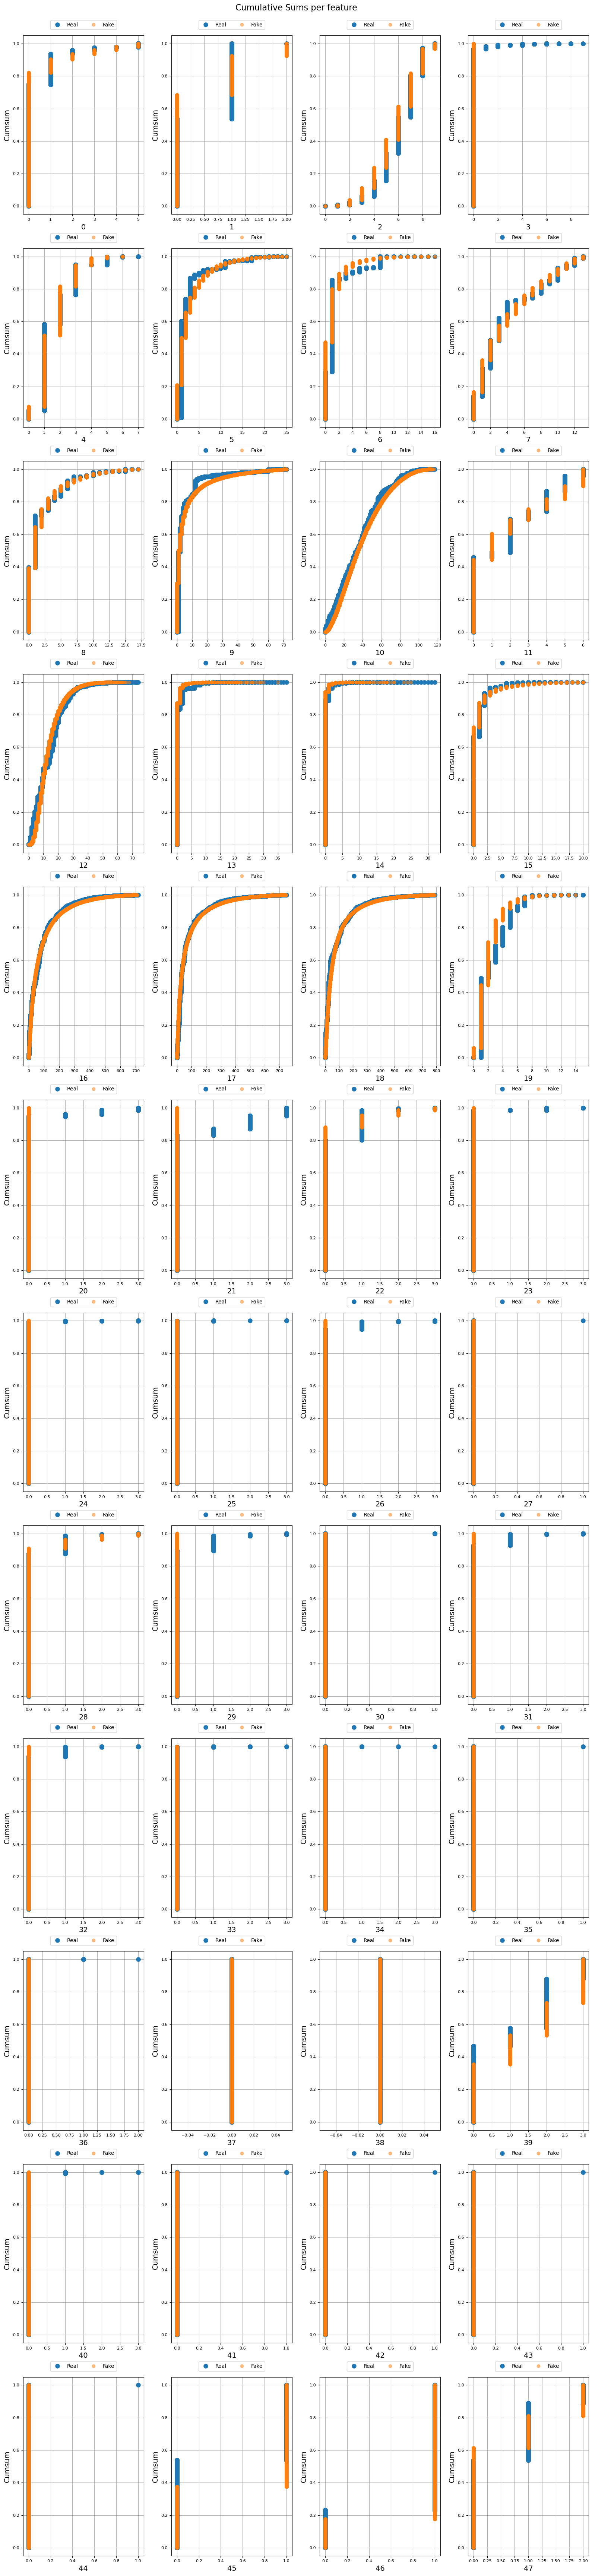

C:\Users\isrea\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\isrea\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\isrea\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['r

C:\Users\isrea\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\isrea\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\isrea\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['r

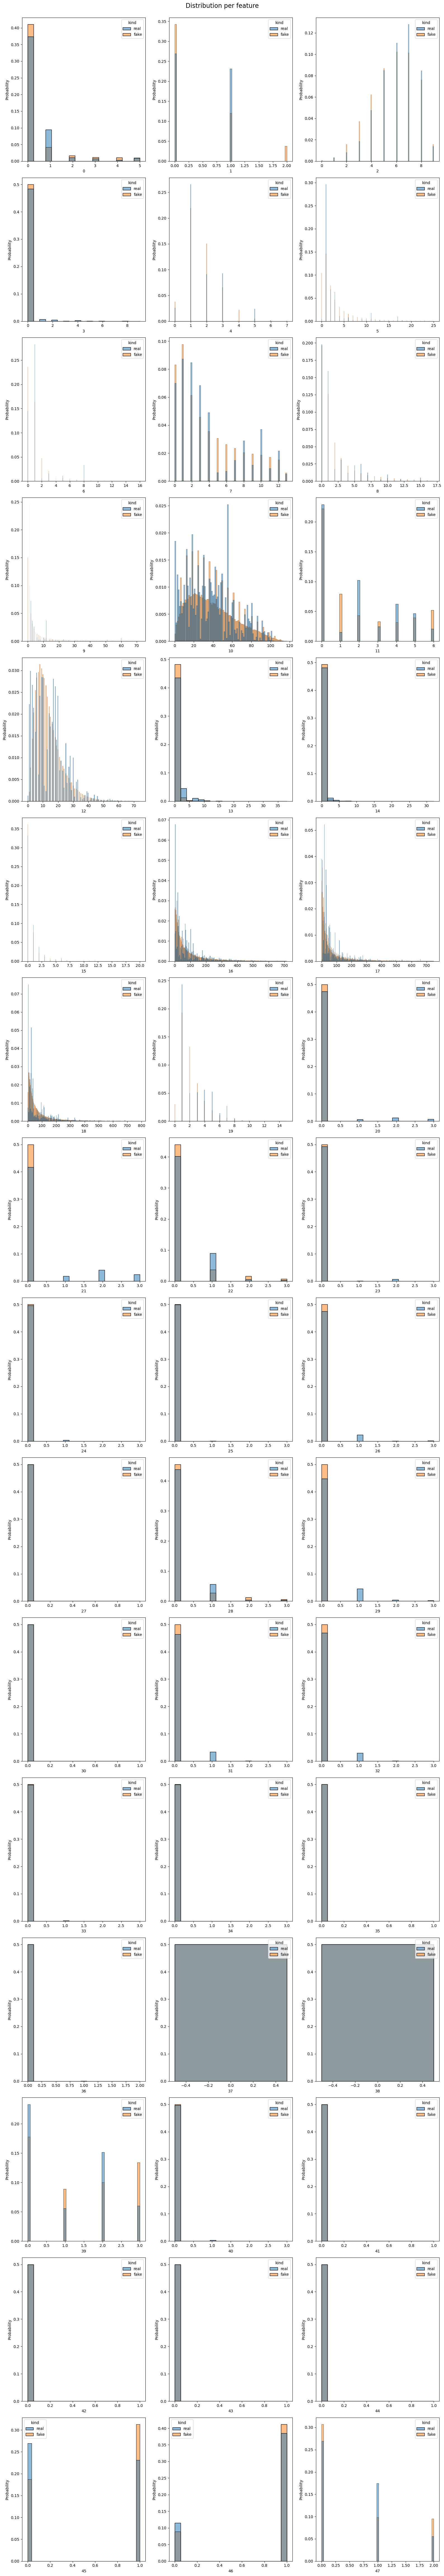

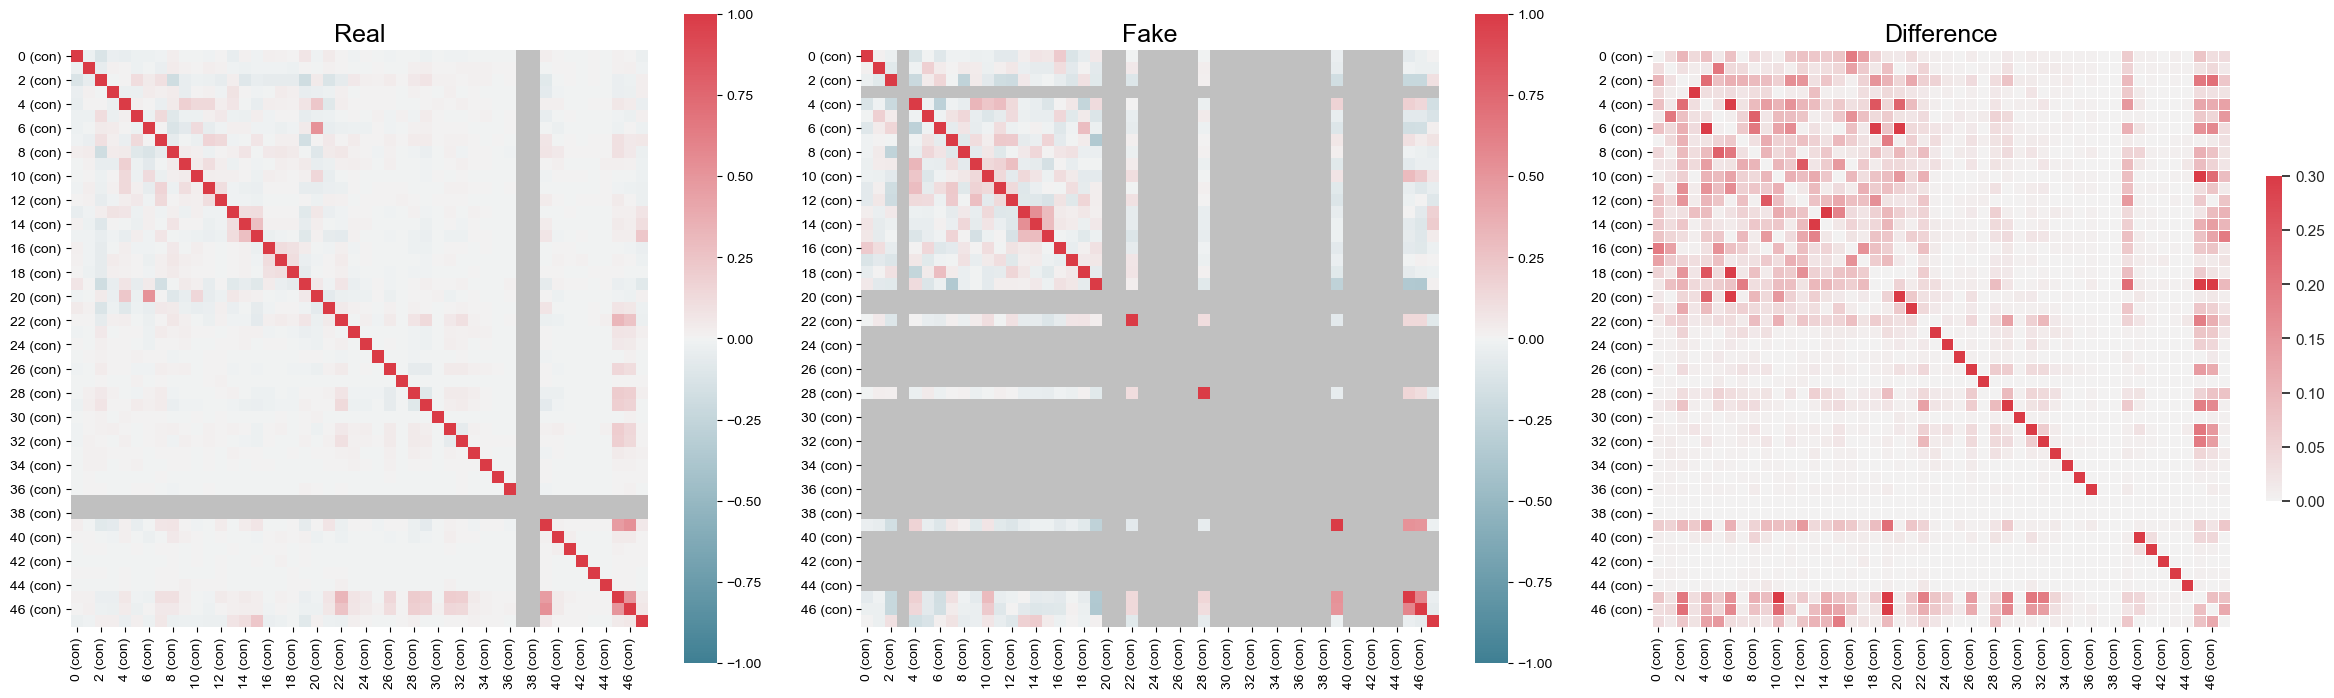

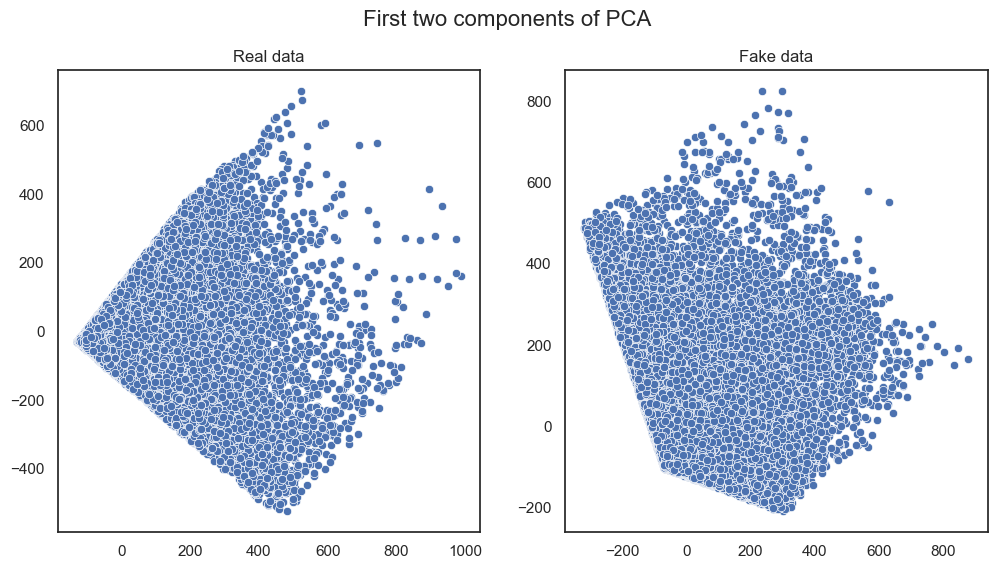

In [50]:
table_evaluator.visual_evaluation()

In [53]:
table_evaluator.evaluate(target_col=47)

C:\Users\isrea\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\isrea\anaconda3\lib\site-packages\pandas\core\frame.py:6257: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  diff = Index(subset).difference(self.columns)



Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.4276   0.5179              0.2710
DecisionTreeClassifier_real   0.4672   0.4041              0.2475
LogisticRegression_fake       0.5719   0.6424              0.6549
LogisticRegression_real       0.5762   0.4911              0.5569
MLPClassifier_fake            0.5481   0.6561              0.5185
MLPClassifier_real            0.5704   0.4603              0.4139
RandomForestClassifier_fake   0.5309   0.6279              0.5130
RandomForestClassifier_real   0.5524   0.4887              0.4304

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                       NaN
nearest neighbor std                        NaN

Miscellaneous results:
                                  Result
Column Cor

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

In [89]:
real_X = real_data.drop(47, axis=1)
real_y = real_data[47]
fake_X = fake_data.drop(47, axis=1)
fake_y = fake_data[47]

In [90]:
real_X.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
35956,0,0,7,0,1,1,5,11,4,2,...,0,0,2,0,0,0,0,0,0,1
60927,0,1,5,0,1,1,0,0,3,1,...,0,0,0,0,0,0,0,0,0,1
79920,0,0,6,0,3,3,0,3,3,1,...,0,0,0,0,0,0,0,0,0,1
50078,0,1,3,0,2,1,0,6,7,7,...,0,0,0,0,0,0,0,0,0,1
44080,1,0,6,0,1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [91]:
real_X_train, real_X_test, real_y_train, real_y_test = train_test_split(real_X, real_y, test_size=0.2, random_state=42, shuffle=True)
fake_X_train, fake_X_test, fake_y_train, fake_y_test = train_test_split(fake_X, fake_y, test_size=0.2, random_state=42, shuffle=True)

In [92]:
# Train and evaluate DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(real_X_train, real_y_train)
dt_f1_real = f1_score(real_y_test, dt.predict(real_X_test), average='weighted')
dt_f1_fake = f1_score(fake_y_test, dt.predict(fake_X_test), average='weighted')

# Train and evaluate LogisticRegression
lr = LogisticRegression()
lr.fit(real_X_train, real_y_train)
lr_f1_real = f1_score(real_y_test, lr.predict(real_X_test), average='weighted')
lr_f1_fake = f1_score(fake_y_test, lr.predict(fake_X_test), average='weighted')

# Train and evaluate MLPClassifier
mlp = MLPClassifier()
mlp.fit(real_X_train, real_y_train)
mlp_f1_real = f1_score(real_y_test, mlp.predict(real_X_test), average='weighted')
mlp_f1_fake = f1_score(fake_y_test, mlp.predict(fake_X_test), average='weighted')


In [95]:
# real_y_test
y_pred = dt.predict(real_X_test)

In [93]:
print('DecisionTreeClassifier F1 score for real data: {}'.format(dt_f1_real))
print('DecisionTreeClassifier F1 score for fake data: {}'.format(dt_f1_fake))
print('LogisticRegression F1 score for real data: {}'.format(lr_f1_real))
print('LogisticRegression F1 score for fake data: {}'.format(lr_f1_fake))
print('MLPClassifier F1 score for real data: {}'.format(mlp_f1_real))
print('MLPClassifier F1 score for fake data: {}'.format(mlp_f1_fake))

DecisionTreeClassifier F1 score for real data: 0.47985401217219215
DecisionTreeClassifier F1 score for fake data: 0.4419776013158613
LogisticRegression F1 score for real data: 0.4916286263978715
LogisticRegression F1 score for fake data: 0.4890439233075831
MLPClassifier F1 score for real data: 0.5307109603925474
MLPClassifier F1 score for fake data: 0.49876247130767287
